# Supervised Learning Project

The goal of this project is to predict when Beta Banks' customers will leave based on their behavior. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score

## General Information

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()
print("\n")
#Finding out sum & percentage of missing values in each feature.
print("======= Amount Missing =======")
missing_values_count = df.isnull().sum()
print(missing_values_count[0:10])
print("\n")
print("======= Percent Missing =======")
null = (df.isna().sum()/len(df)) * 100
print(null[null>0].sort_values())
print("\n")
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


======= Amount Missing =======
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure           909
Balance            0
NumOfProducts      0
dtype: int64


====

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### General Information Conclusion

>Tenure could be missing data because of human error.
<br> The column ```Tenure``` has a datatype of float. After reviewing data in this column, it would be okay to change the datatype to int. This is a minor detail and has no impact on the data.
<br>
In the next section, I will make the column titles lowercase and shorten them for brevity. I will also fill in missing data.


## Data Preprocessing

In [3]:
df = df.dropna()
df.columns=df.columns.str.lower()
encoder = OrdinalEncoder() 
encoder.fit(df)
data_ordinal = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)

data_ordinal.rename(columns={'rownumber':'row_num', 'customerid':'cust_id', 
                   'creditscore':'credit_score','numofproducts':'num_products', 
                   'hascrcard':'credit_card', 'isactivemember':'is_active',
                   'estimatedsalary':'estim_salary'}, inplace=True)

data_ordinal['tenure'] = data_ordinal['tenure'].replace(np.nan, 0)
data_ordinal['tenure'] = data_ordinal['tenure'].astype('int')
data_ordinal.sample(5)
#fillna values, convert to int

,row_num,cust_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,credit_card,is_active,estim_salary,exited
7163,7163.0,3619.0,2520.0,172.0,0.0,1.0,31.0,7,0.0,1.0,1.0,1.0,4071.0,0.0
7208,7208.0,606.0,1632.0,199.0,1.0,1.0,15.0,2,5195.0,0.0,1.0,1.0,1672.0,0.0
6681,6681.0,6226.0,1364.0,213.0,2.0,1.0,24.0,10,0.0,1.0,1.0,0.0,8089.0,0.0
8743,8743.0,6075.0,2204.0,111.0,1.0,0.0,26.0,0,3861.0,1.0,1.0,1.0,7163.0,1.0
2542,2542.0,2179.0,938.0,321.0,2.0,0.0,15.0,10,1643.0,1.0,1.0,1.0,2206.0,0.0


> To have the categorical features included in the data, I used ordinal encoding. Ordinal encoding replaces the categories with arbitrary numeric labels. I replaced the missing tenure values with values of 0 as a simple way to fill in missing data. Another way would be to have a separate dataset without the null values. Then create a function that puts the credit scores into groups and group by tenure taking the mean for that specific credit group and replacing the missing values. 

## Splitting Data into test/train/validation set

In [4]:
df_train, df_temp = train_test_split(data_ordinal,test_size=0.4, random_state=12345)
df_test, df_valid = train_test_split(df_temp, test_size=0.5, random_state=12345)

features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']

features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']

features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

print("trained features:")
print(features_train.head(5))
print('')
print("trained targets:")
print(target_train.head(5))

trained features:
      row_num  cust_id  surname  credit_score  geography  gender   age  \
8483   8483.0   5603.0    165.0         334.0        0.0     0.0  10.0   
3431   3431.0    417.0   1847.0         144.0        0.0     1.0   8.0   
6770   6770.0   1150.0   1595.0         217.0        0.0     1.0  22.0   
1350   1350.0   4922.0   1520.0         183.0        0.0     1.0  18.0   
4047   4047.0   2003.0   1592.0         156.0        0.0     1.0  13.0   

      tenure  balance  num_products  credit_card  is_active  estim_salary  
8483       2   2228.0           0.0          1.0        0.0        4615.0  
3431       7   1879.0           0.0          0.0        0.0        4722.0  
6770       9      0.0           0.0          1.0        1.0        6822.0  
1350       6      0.0           1.0          1.0        1.0        2146.0  
4047       4      0.0           1.0          0.0        1.0        1151.0  

trained targets:
8483    0.0
3431    0.0
6770    0.0
1350    0.0
4047    0.0
Nam

Confusion Matrix
[[1258  210]
 [ 163  188]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      1468
         1.0       0.47      0.54      0.50       351

    accuracy                           0.79      1819
   macro avg       0.68      0.70      0.69      1819
weighted avg       0.81      0.79      0.80      1819



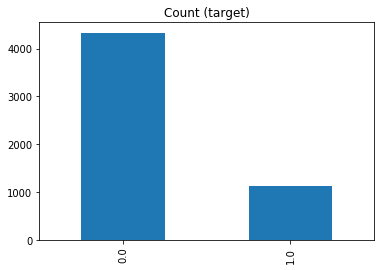

In [5]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("Confusion Matrix")
print(confusion_matrix(target_valid, predicted_valid))
print("")
print("Classification Report:\n", classification_report(target_valid, predicted_valid))

# Class count
count_class_0, count_class_1 = df_train['exited'].value_counts()

# Divide by class
df_class_0 = df_train[df_train['exited'] == 0]
df_class_1 = df_train[df_train['exited'] == 1]
df_train.exited.value_counts().plot(kind='bar', title='Count (target)');

### Conclusion

>Since we are trying to predict whether a client will leave the blank or not, our target is ```exited```. We call the rest of the columns features. We then split the data into two variables df_train and df_temp. df_temp was created so it could be split again to make the df_test and df_valid variables. A confusion_matrix was run to discover if there is a class imbalance. After generating the matrix we see a large presence of true negative answers. True negative is an outcome where the model correctly predicts the negative class. So this isn't necessarily bad.
<br>
For conciseness, I created a classification report and displayed a bar graph. As expected, the 0 class (false or have not left the bank yet) has a large presence in the data. In the next section I will improve the model quality by performing downsampling and upsampling.

## Improving Model Quality

### Method 1: Random Downsampling

>Downsampling fixes class imbalance but randomly eliminates majority class examples. It conceeds when the classes are balanced.

Random downsampling:
1.0    1126
0.0    1126
Name: exited, dtype: int64


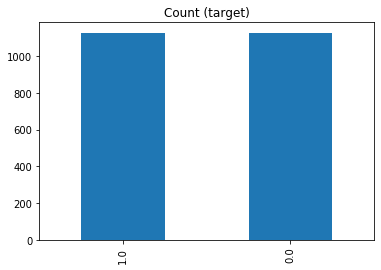

In [6]:
# Class count
count_class_0, count_class_1 = df_train['exited'].value_counts()

# Divide by class
df_class_0 = df_train[df_train['exited'] == 0] # have not left the bank yet
df_class_1 = df_train[df_train['exited'] == 1] # have left the bank

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random downsampling:')
print(df_test_under.exited.value_counts())

df_test_under.exited.value_counts().plot(kind='bar', title='Count (target)');

### Method 1: Conclusion

> Using the random undersampling method, we are able to balance the data with equal counts on both class 0 and class 1 by eliminating the majority class examples (in this case decreasing the class 0.) While this is a good thing, the consequence of using the random undersampling method is possible loss of important data to build classifiers. This is evident in the class count above! Another consequence is that the sample chosen to undersample could be biased.

### Method 2: Random Upsampling

Simple upsampling:
1.0    4328
0.0    4328
Name: exited, dtype: int64


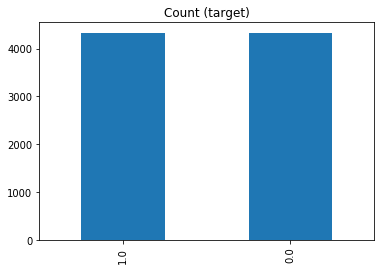

In [7]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Simple upsampling:')
print(df_test_over.exited.value_counts())

df_test_over.exited.value_counts().plot(kind='bar', title='Count (target)');

### Method 2: Conclusion

>Using the random upsampling method, we are able to balance the data with equal counts on both class 0 and class 1 by replicating the minority class examples (in this case we increase the class 1.) While this is a good thing, the consequence of using the random upsampling method is overfitting.

> We will continue the project with the results from the random upsampling as we have more data to work with.

## Building Model

### Decision Tree Classifier

In [8]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6, criterion='entropy',
                                              min_samples_split=10,
                                              min_samples_leaf=15, 
                                              max_features=None, 
                                              max_leaf_nodes=None, 
                                              class_weight="balanced")
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("f1 test:",f1_score(target_test, predicted_test))
print("f1 valid:", f1_score(target_valid, predicted_valid))
print("auc_roc:", auc_roc)

f1 test: 0.5720294426919034
f1 valid: 0.5493757094211124
auc_roc: 0.8285067188336944


> The AUC ROC metric measures the aggregate performance of all possible classification models. Our AUC ROC score is 0.82 which means the data has a good measure of separability.

### Random Forest Classifier

In [9]:
rfc = RandomForestClassifier(n_estimators=30,
                                              criterion='gini', 
                                              max_depth=None,
                                              min_samples_split=20,
                                              min_samples_leaf=12, 
                                              max_features=None, 
                                              max_leaf_nodes=None, 
                                              n_jobs=1, 
                                              random_state=None,
                                              warm_start=False, 
                                              class_weight=None)
    #n_estimators=10, max_depth=15, criterion='gini', random_state=12345)
rfc.fit(features_train, target_train)
rfc_preds_test = rfc.predict(features_test)
rfc_preds_valid = rfc.predict(features_valid)

probabilities_valid = rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("f1 test:",f1_score(target_test, rfc_preds_test))
print("f1 valid:",f1_score(target_valid, rfc_preds_valid))
print("auc_roc:", auc_roc)

f1 test: 0.5661641541038525
f1 valid: 0.5642857142857142
auc_roc: 0.855600386594937


### Building Model: Conclusion

>The RandomForest Classifier gives us an f1 score of 0.5953 meaning the balance between the precision and the recall is just about equal. The f1 score for the validation is in the same area, but not quite. To find how much our model differs from the random model, we calculate the AUC ROC and sees it does better than the DecisionTree Classifier.

## Checking the quality of the model

In [10]:
rfc_predictionsv2 = rfc.predict(features_test)
print("RandomForest Classifier Accuracy")
print("Test set:", accuracy_score(target_test, rfc_predictionsv2))
print("")
print(rfc_predictionsv2[0:100])

RandomForest Classifier Accuracy
Test set: 0.8575357535753575

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0.]


## Results

> To study customers' behaviors we split the data into three separate categories: training, testing, and validation. We then used ordinal encoding to assign random meaningless numbers to our categorical columns so we can use them. After, we used upsampling and downsampling to balance the dataset as the 0 class was heavily weighted. To train the data we used the DecisionTree Classifier and RandomForest Classifier. The RandomForest Classifier gave us the best f1 and AUC ROC score (0.598 and .854 respectively). We've created trained and tested a model, but what does this mean for Beta Bank? This means the data has a good measure of separability and it is a reliable tool for Beta Bank to use to get a good sense of whether a customer will leave the bank.